In [26]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def bond_price(maturity, coupon_rate, face_value, ytm):
    
    coupon = coupon_rate*face_value

    discount_factors = [1/(1+ytm)**i for i in range(1, maturity+1)]
    cashflows = [coupon]*maturity
    cashflows [-1] += face_value

    return np.array(discount_factors)@np.array(cashflows)



def bond_price_settlement(maturity_date, coupon_rate, face_value, ytm, settlement_date):
    coupon = coupon_rate*face_value

    settlement_date = datetime.strptime(settlement_date, "%d/%m/%Y")
    maturity_date = datetime.strptime(maturity_date, "%d/%m/%Y")
    last_coupon_date = maturity_date.replace(year=settlement_date.year-1)
    next_coupon_date = maturity_date.replace(year=settlement_date.year)

    maturity = maturity_date.year-next_coupon_date.year+1

    t1 = (next_coupon_date-settlement_date).days/365

    time = np.array([t1 + i for i in range(maturity)])
    cashflows = np.array([coupon]*maturity)
    cashflows[-1] += face_value
    discount_factors = 1/(1+ytm)**time

    accrued_interest = (settlement_date - last_coupon_date).days/365 * coupon

    dirty_price = discount_factors@cashflows
    clean_price = dirty_price - accrued_interest

    return dirty_price, clean_price



def duration(maturity, coupon_rate, face_value, ytm, mod=True):
    coupon = coupon_rate*face_value
    discount_factors_time = [i/(1+ytm)**i for i in range(1, maturity+1)]
    cashflows = [coupon]*maturity
    cashflows [-1] += face_value

    P = bond_price(maturity, coupon_rate, face_value, ytm)

    
    if mod == True:
        return np.array(discount_factors_time)@np.array(cashflows)/(P*(1+ytm))
    else:
        return np.array(discount_factors_time)@np.array(cashflows)/P


def convexity(maturity, coupon_rate, face_value, ytm):
    coupon = coupon_rate*face_value
    discount_factors_time = [i*(i+1)/(1+ytm)**i for i in range(1, maturity+1)]
    cashflows = [coupon]*maturity
    cashflows [-1] += face_value

    P = bond_price(maturity, coupon_rate, face_value, ytm)

    return np.array(discount_factors_time)@np.array(cashflows)/(P*(1+ytm)**2)

In [31]:
#Parameters:

maturity = 100
coupon_rate = 0.00
face_value = 100
ytm = 0.03

bond_price(maturity, coupon_rate, face_value, ytm)

5.203283985020897

In [24]:
maturity = 10
coupon_rate = 0.03
face_value = 100
ytm = 0.03

duration(maturity, coupon_rate, face_value, ytm)

8.53020283677583

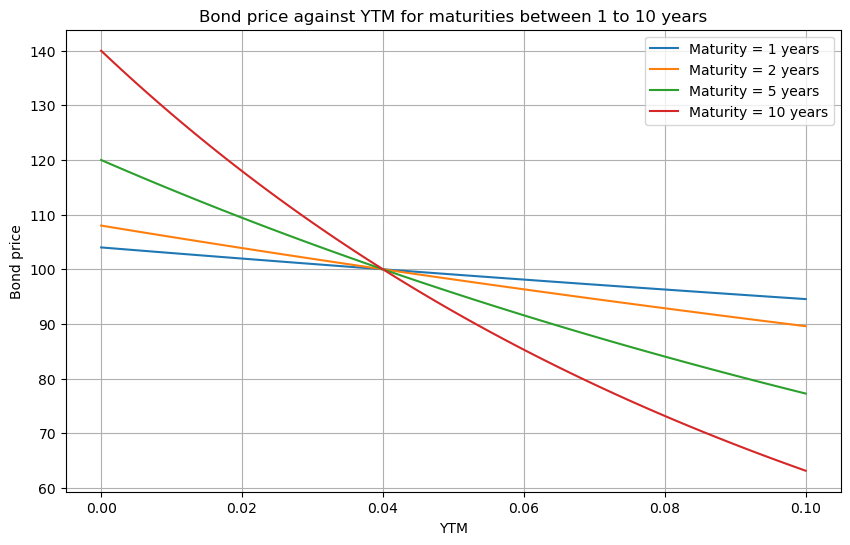

In [42]:
coupon_rate = 0.04
face_value = 100

rate_range = np.linspace(0.00,0.1,100)
maturity_range = [1, 2, 5, 10]

plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    price_values = [bond_price(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    plt.plot(rate_range, price_values, '-', label=f'Maturity = {maturity} years')


#plt.plot(rate_range, price_values, '-')
plt.xlabel('YTM')
plt.ylabel('Bond price')
plt.title('Bond price against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show()

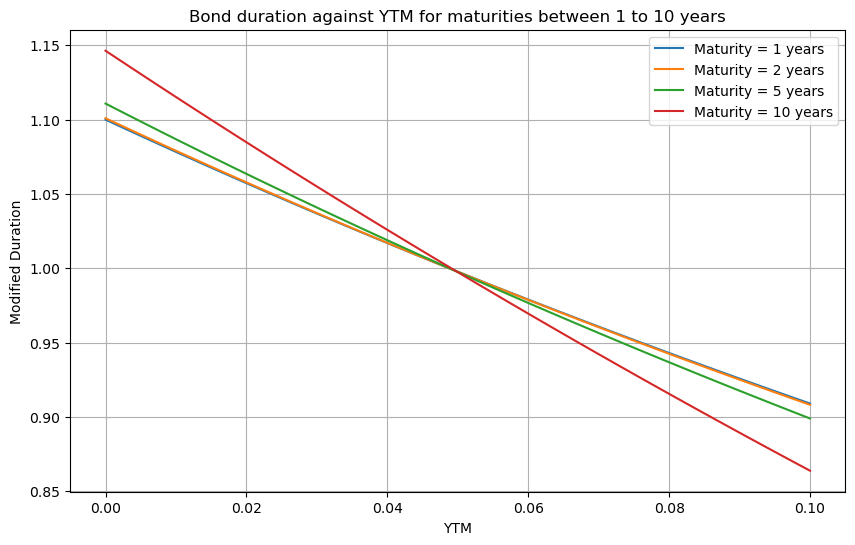

In [46]:
coupon_rate = 0.04
face_value = 100

rate_range = np.linspace(0.00,0.1,100)
maturity_range = [1, 2, 5, 10]

plt.figure(figsize=(10,6))

for maturity in maturity_range: 
    duration_values = [duration(maturity, coupon_rate, face_value, rate) for rate in rate_range]
    duration_values = duration_values/np.mean(duration_values)
    plt.plot(rate_range, duration_values, '-', label=f'Maturity = {maturity} years')


#plt.plot(rate_range, price_values, '-')
plt.xlabel('YTM')
plt.ylabel('Modified Duration')
plt.title('Bond duration against YTM for maturities between 1 to 10 years')
plt.legend()
plt.grid()
plt.show()

1.5